In [11]:
from typing import TypedDict

class PortfolioState(TypedDict):
    amount_usd: float
    total_usd: float
    total_inr: float

In [12]:
def calc_total(state: PortfolioState) -> PortfolioState:
    state['total_usd'] = state['amount_usd'] * 1.08
    return state

def convert_to_inr(state: PortfolioState) -> PortfolioState:
    state['total_inr'] = state['total_usd'] * 85
    return state

In [13]:
from langgraph.graph import StateGraph, START, END

builder = StateGraph(PortfolioState)

builder.add_node("calc_total_node", calc_total)
builder.add_node("convert_to_inr_node", convert_to_inr)

builder.add_edge(START, "calc_total_node")
builder.add_edge("calc_total_node", "convert_to_inr_node")
builder.add_edge("convert_to_inr_node", END)

graph = builder.compile()

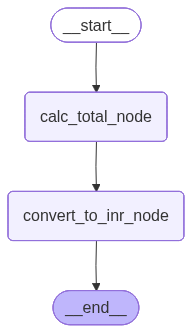

In [14]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [15]:
graph.invoke({"amount_usd": 100000})

{'amount_usd': 100000, 'total_usd': 108000.0, 'total_inr': 9180000.0}

In [16]:
graph.invoke({"amount_usd": 50000})

{'amount_usd': 50000, 'total_usd': 54000.0, 'total_inr': 4590000.0}

In [20]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

class State(TypedDict):
    topic: str
    research: str
    draft: str

graph = StateGraph(State)

def researcher(state: State):
    return {"research": f"Researching {state['topic']}"}

def writer(state: State):
    return {"draft": f"Writing based on {state['research']}"}


graph.add_node("researcher", researcher)
graph.add_node("writer", writer)

graph.add_edge(START, "researcher")
graph.add_edge("researcher", "writer")
graph.add_edge("writer", END)



# 4️⃣ Compile and runS
app = graph.compile()

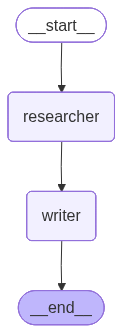

In [22]:
from IPython.display import Image, display

display(Image(app.get_graph().draw_mermaid_png()))

In [23]:
# 4️⃣ Compile and runS
#app = graph.compile()
result = app.invoke({"topic": "AI in healthcare"})
print(result)


{'topic': 'AI in healthcare', 'research': 'Researching AI in healthcare', 'draft': 'Writing based on Researching AI in healthcare'}


In [25]:
from groq import Groq
from dotenv import load_dotenv
load_dotenv()
import os 



# Initialize your LLM with Groq
client = Groq(api_key=os.environ.get("GROQ_API_KEY"))

#llm = Groq(model="llama3‑70b‑8192", api_key="YOUR_GROQ_API_KEY")


model_name="llama-3.1-8b-instant"
# 3️⃣ Create a simple chat completion
user_prompt = "Research the topic: Impact of renewable energy in India in 3 sentences."

response = client.chat.completions.create(
    model=model_name,
    messages=[
        {"role": "user", "content": user_prompt}
    ]
)

# 4️⃣ Print the model's reply
# Correct way to access content
print(response.choices[0].message.content)

In India, the adoption of renewable energy has been growing rapidly, contributing significantly to the country's efforts to reduce dependence on fossil fuels and mitigate climate change. By 2022, renewable energy accounted for about 24% of India's installed power generation capacity, with solar and wind power being the leading sources. The government's ambitious target of 40% non-fossil energy capacity by 2030 has also prompted significant investments in renewable energy, which is expected to drive economic growth, create jobs, and address energy poverty, especially in rural areas.
